# Section for imports

In [1]:
# section for imports
# warte zapamietania na przyszlosc, kernel jupytera nie radzi sobie z odczytywaniem zawartosci plikow na "zywo" 
import pandas as pd
import numpy as np
import random 
import seaborn as sns
from matplotlib import pyplot as plt
from utilities.plots import (
    my_confusion_matrixs, 
    plot_2d_space, 
    train_predict_and_count_confusion_matrix, 
    roc_plot, 
    count_scores
    )
from collections import defaultdict
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE 
from imblearn.over_sampling import SVMSMOTE 
from imblearn.over_sampling import KMeansSMOTE



from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
# dupa 
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Notebook variables

In [2]:
file_directory = "../datasets/credit_fraud_detection/creditcard.csv"
plt.rcParams["figure.figsize"] = (12,10)
random.seed(10)


matrix_class_desc =["Genuine", "Fraud"] 

split_plinter = lambda x, y, x_test, y_test : f""" 
shape of x train {x.shape} \n 
shape of y train {y.shape} \n  
shape of x test {x_test.shape} \n
shape of y test {y_test.shape}
""" 



def perform_training_and_predict(x_train_data, y_train_data, x_test_data, algorithm):
    algorithm.fit(x_train_data, y_train_data)
    return  algorithm.predict(x_test_data)

## SMOTE PARAMS TREE 

In [3]:
best_SMOTE_tree = {
    "random_state": 0,
    "k_neighbors": 2,
    "sampling_strategy": "auto"
}
SMOTE_tree_cls = {
    "criterion": "entropy",
    "max_depth": None,
    "max_features": None,
    "min_samples_leaf": 1,
    "min_samples_split": 3,
    "random_state": 0,
    "splitter": "best"
}
best_SVMSMOTE_TREE ={
    "random_state": 0,
    "k_neighbors": 7,
    "sampling_strategy": "auto"
}
SVMSMOTE_tree_params_cls = {
    "criterion": "entropy",
    "max_depth": 3,
    "splitter": "best",
    "random_state" : 0
}
best_KMEANS_SMOTE_tree = {
    "random_state": 0,
    "cluster_balance_threshold": 0.1,
    "k_neighbors": 4,
    "sampling_strategy": "auto"
}  
KMEANS_SMOTE_tree_cls = {
    "criterion": "entropy",
    "max_depth": None,
    "max_features": None,
    "min_samples_leaf": 3,
    "min_samples_split": 2,
    "random_state": 0,
    "splitter": "random"
}

best_kmeans_mini_tree = {
    "max_iter": 100,
    "max_no_improvement": 10,
    "n_clusters": 100,
    "random_state" : 0
}
best_borderline_smote_tree = {
    "k_neighbors": 3,
    "kind": "borderline-1",
    "m_neighbors": 7,
    "sampling_strategy": "auto",
    "random_state": 0 
}
borderline_smote_tree_cls = {
    "criterion": "entropy",
    "max_depth": None,
    "max_features": "sqrt",
    "min_samples_leaf": 3,
    "min_samples_split": 2,
    "random_state": 0,
    "splitter": "best"
}


## SMOTE PARAMS LOGISTIC REG

In [4]:
best_SMOTE_log_reg = {
    "k_neighbors": 6,
    "random_state": 0,
    "sampling_strategy": "auto"
}

best_SVMSMOTE_log_reg = {
    "k_neighbors": 7,
    "random_state": 0,
    "sampling_strategy": "auto"
}

best_KMEANS_SMOTE_log_reg = {
    "cluster_balance_threshold": 0.1,
    "k_neighbors": 2,
    "sampling_strategy": "auto",
    "random_state": 0
}

best_kmeans_mini_log_reg = {
    "max_iter": 100,
    "max_no_improvement": 10,
    "n_clusters": 100,
    "random_state" : 0
}
best_log_reg_cls = {
    "C": 0.001,
    "max_iter": 2500,
    "penalty": "l2",
}

best_borderline_SMOTE_log_reg = {
    "k_neighbors": 7,
    "kind": "borderline-2",
    "m_neighbors": 12,
    "random_state": 0,
    "sampling_strategy": "auto"
}



## MIX SMOTE AND COST SENSITIVE CLS params




In [5]:
IR = 0.001727485630620034
IR = 0.032
class_weights = {0 :IR, 1:1-IR} 

best_params_log_reg_sensitive = {
    'C': 0.001,
    'class_weight': class_weights,
    'max_iter': 2500,
    'penalty': 'l2'
}


best_params_dec_tree_sensitive = {
    'class_weight': class_weights, 
    'criterion': 'gini', 
    'max_depth': 5, 
    'random_state': 0, 
    'splitter': 'best'
}



best_log_reg_cls_sensitive = {
    **best_log_reg_cls,
    'class_weight': class_weights , 
}

borderline_smote_tree_cls_sensitive = {
    **borderline_smote_tree_cls,
    'class_weight': class_weights , 
}

KMEANS_SMOTE_tree_cls_sensitive = {
    **KMEANS_SMOTE_tree_cls,
    'class_weight': class_weights , 

}

SVMSMOTE_tree_params_cls_sensitive = {
    **SVMSMOTE_tree_params_cls,
    'class_weight': class_weights , 

}

SMOTE_tree_cls_sensitive = {
    **SMOTE_tree_cls,
    'class_weight': class_weights , 
}




# Dataset

## Load data

In [6]:
data = pd.read_csv(file_directory)
features = data.columns
response = data["Class"]

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Display recall distribution

0:  284315
1:  492
[]


Text(0.5, 1.0, "Distribution of transaction's class column")

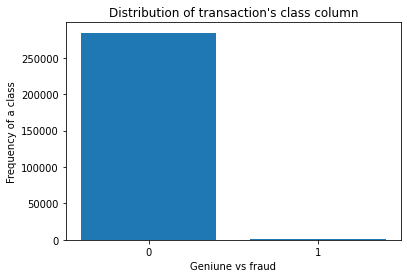

In [7]:
(unique, counts) = np.unique(response, return_counts=True)

for val, count in zip(unique , counts):
    print(f"{val}:  {count}")
null_columns = [col for col in data.columns if data[col].isnull().any()]
print(null_columns)
classes = unique.astype(np.str0)
plt.bar(classes,  counts )
plt.xlabel("Geniune vs fraud")
plt.ylabel("Frequency of a class")
plt.title("Distribution of transaction's class column")

## Feature exploration  

### Show distribution of `Time` and `Amount` 

Text(0.5, 1.0, 'Dystrybucja czasu')

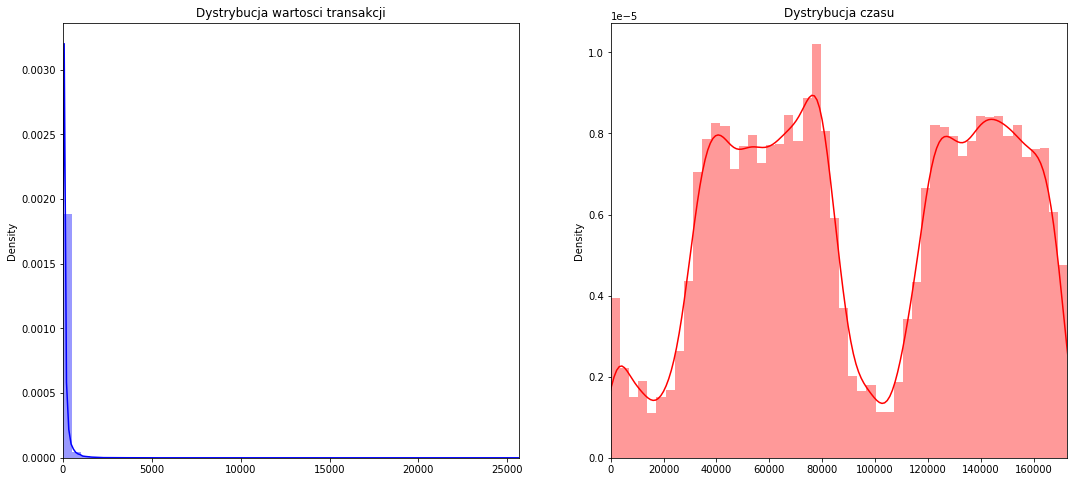

In [8]:
fig , ax = plt.subplots(1, 2, figsize=(18,8))
amount_val = data.Amount.values
time_val = data.Time.values

sns.distplot(amount_val, ax=ax[0], color='blue')
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_title("Dystrybucja wartosci transakcji")

sns.distplot(time_val, ax=ax[1], color='r')
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_title("Dystrybucja czasu")

### Check data features for null values, datatypes

In [9]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Scale data `Amount` and `Time`

In [11]:
# Use of robust scaler because its less vulnerable to outliers
scaler = RobustScaler()

new_df = data.copy()
new_df["ScaledAmount"] = scaler.fit_transform(new_df.Amount.values.reshape(-1, 1))
new_df["ScaledTime"] = scaler.fit_transform(new_df.Time.values.reshape(-1, 1))
new_df.drop("Amount", axis=1, inplace=True )
new_df.drop("Time", axis=1, inplace=True )
columns = new_df.columns.values.tolist()

### Split data on test and train datasets

In [12]:
random_state = 0 
iterate = 0 
x = new_df.drop(['Class' ], axis=1)
y = new_df["Class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
random_state=random_state,
test_size=0.30  )

# Methods to tackle dataset

## Data preprocessing

### SMOTE - Synthetic Minority Oversampling Technique

Works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.
Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

#### SMOTE

In [13]:
smote_tree = SMOTE(**best_SMOTE_tree)
smote_log_reg =SMOTE(**best_SMOTE_log_reg)
x_train_SMOTE_log_reg, y_train_SMOTE_log_reg = smote_log_reg.fit_resample(x_train, y_train)
x_train_SMOTE_tree, y_train_SMOTE_tree = smote_tree.fit_resample(x_train, y_train)


#### k-means-SMOTE 
https://arxiv.org/pdf/1711.00837.pdf
K-means SMOTE consists of three steps: clustering, filtering, and oversampling. 


In the clustering step,
the input space is clustered into k groups using k-means clustering. 

The filtering step selects clusters
for oversampling, retaining those with a high proportion of minority class samples. 
It then distributes the number of synthetic samples to generate, assigning more samples 
to clusters where minority samples are sparsely distributed. 

Finally, in the oversampling step, SMOTE is applied in each selected cluster to achieve the target ratio of minority and majority instances.

In [14]:
from sklearn.cluster import MiniBatchKMeans as MiniKM
clf = MiniKM(n_clusters = 100, random_state = 0)

smote_kmeans_tree = KMeansSMOTE(**best_KMEANS_SMOTE_tree, kmeans_estimator=clf)
smote_kmeans_log = KMeansSMOTE(**best_KMEANS_SMOTE_log_reg, kmeans_estimator=clf)

x_train_SMOTE_Kmeans_log_reg, y_train_SMOTE_Kmeans_log_reg = smote_kmeans_log.fit_resample(x_train, y_train)
x_train_SMOTE_Kmeans_tree, y_train_SMOTE_Kmeans_tree = smote_kmeans_tree.fit_resample(x_train, y_train)



#### SVM-SMOTE
uses an SVM (Support Vector Machine) classifier to find support vectors and generate samples considering them. Note that the C parameter of the SVM classifier allows to select more or less support vectors.

In [15]:
smote_SVM_tree = SVMSMOTE(**best_SVMSMOTE_TREE)
smote_SVM_log_reg = SVMSMOTE(**best_SVMSMOTE_log_reg)

x_train_SMOTE_SVM_log_reg, y_train_SMOTE_SVM_log_reg = smote_SVM_log_reg.fit_resample(x_train, y_train)
x_train_SMOTE_SVM_tree, y_train_SMOTE_SVM_tree = smote_SVM_tree.fit_resample(x_train, y_train)


#### BorderlineSMOTE

Works the same way as SMOTE, expect that instead of generating points around every point of the minority class each point is first being classified into the boxes **"danger"** and **"not"**. For each point the k nearest neighbors is calculated. If all the neighbors comes from different class, then it is marked as a noise and put in to the "not" box. If more then half of the neighbors comes from a different class it is labeled "danger.

If `all_neighbors = FALSE` then points will be generated between nearest neighbors in its own class. If `all_neighbors = TRUE` then points will be generated between **any nearest neighbors**

The parameter `neighbors` controls the way the new examples are created. For each currently existing minority class example X new examples will be created These examples will be generated by using the information from the neighbors nearest neighbor of each example of the minority class. The parameter `neighbors` controls how many of these neighbor are used.

In [16]:
smote_borderline_tree = BorderlineSMOTE(**best_borderline_smote_tree)
smote_borderline_log_reg = BorderlineSMOTE(**best_borderline_SMOTE_log_reg)

x_train_SMOTE_borderline_log_reg, y_train_SMOTE_borderline_log_reg = smote_SVM_log_reg.fit_resample(x_train, y_train)
x_train_SMOTE_borderline_tree, y_train_SMOTE_borderline_tree = smote_SVM_tree.fit_resample(x_train, y_train)

### Random oversampling 

In [17]:

# oversample = RandomOverSampler(**rand_oversample_log_best)
# x_train_RANDOM, y_train_RANDOM = oversample.fit_resample(x_train, y_train)

## Cost sensitive learning 

In [18]:
log_model_sensitive = LogisticRegression(**best_params_log_reg_sensitive)
tree_model_sensitive  = DecisionTreeClassifier(**best_params_dec_tree_sensitive)


# SMOTE-log
log_model_SMOTE_sensitive = LogisticRegression(**best_log_reg_cls_sensitive)
log_model_SVM_SMOTE_sensitive = LogisticRegression(**best_log_reg_cls_sensitive)
log_model_borderline_SMOTE_sensitive = LogisticRegression(**best_log_reg_cls_sensitive)
log_model_kmeans_SMOTE_sensitive = LogisticRegression(**best_log_reg_cls_sensitive)


# SMOTE -tree 
tree_model_SMOTE_sensitive = DecisionTreeClassifier(**SMOTE_tree_cls_sensitive)
tree_model_SVM_SMOTE_sensitive = DecisionTreeClassifier(**SVMSMOTE_tree_params_cls_sensitive)
tree_model_borderline_SMOTE_sensitive = DecisionTreeClassifier(**borderline_smote_tree_cls_sensitive)
tree_model_kmeans_SMOTE_sensitive = DecisionTreeClassifier(**KMEANS_SMOTE_tree_cls_sensitive)

# Classifiers 

In [19]:
list_matrix_conf_log_reg = []
list_matrix_conf_tree = []
list_matrix_conf_log_reg_sens = []
list_matrix_conf_tree_sens = []

## Logistic Regression Classifier
### SMOTE AND COST SENSITIVE

In [20]:
log_model_SMOTE = LogisticRegression(**best_log_reg_cls)
log_model_SVM_SMOTE = LogisticRegression(**best_log_reg_cls)
log_model_borderline_SMOTE = LogisticRegression(**best_log_reg_cls)
log_model_kmeans_SMOTE = LogisticRegression(**best_log_reg_cls)

# log_model_clean = LogisticRegression(**best_params_log_reg)
# log_model_RAND = LogisticRegression(**best_params_log_reg)

list_matrix_conf_log_reg.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_log_reg, y_train_SMOTE_log_reg, x_test, y_test, log_model_SMOTE ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_tree).__name__}"
    }
)
list_matrix_conf_log_reg.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_SVM_log_reg, y_train_SMOTE_SVM_log_reg, x_test, y_test, log_model_SVM_SMOTE ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_SVM_tree).__name__}"
    }
)
list_matrix_conf_log_reg.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_borderline_log_reg, y_train_SMOTE_borderline_log_reg, x_test, y_test, log_model_borderline_SMOTE ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_borderline_tree).__name__}"
    }
)
list_matrix_conf_log_reg.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_Kmeans_log_reg, y_train_SMOTE_Kmeans_log_reg, x_test, y_test, log_model_kmeans_SMOTE ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_kmeans_tree).__name__}"
    }
)
list_matrix_conf_log_reg.append(
    {
    "matrix":  train_predict_and_count_confusion_matrix(
        x_train, y_train, x_test, y_test, log_model_sensitive),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}, \n  after using cost sensitive learning "
    }
)

### Mixed SMOTE and Cost Sensitice

In [21]:
list_matrix_conf_log_reg_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_log_reg, y_train_SMOTE_log_reg, x_test, y_test, log_model_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_tree).__name__} and CL"
    }
)
list_matrix_conf_log_reg_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_SVM_log_reg, y_train_SMOTE_SVM_log_reg, x_test, y_test, log_model_SVM_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_SVM_tree).__name__} and CL"
    }
)
list_matrix_conf_log_reg_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_borderline_log_reg, y_train_SMOTE_borderline_log_reg, x_test, y_test, log_model_borderline_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_borderline_tree).__name__} and CL"
    }
)
list_matrix_conf_log_reg_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_Kmeans_log_reg, y_train_SMOTE_Kmeans_log_reg, x_test, y_test, log_model_kmeans_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(log_model_SMOTE).__name__}\n after using {type(smote_kmeans_tree).__name__} and CL"
    }
)



## Decision Tree Classifier
### SMOTE AND COST SENSITIVE

In [22]:

tree_model_SMOTE = DecisionTreeClassifier(**SMOTE_tree_cls)
tree_model_SVM_SMOTE = DecisionTreeClassifier(**SVMSMOTE_tree_params_cls)
tree_model_borderline_SMOTE = DecisionTreeClassifier(**borderline_smote_tree_cls)
tree_model_kmeans_SMOTE = DecisionTreeClassifier(**KMEANS_SMOTE_tree_cls)


list_matrix_conf_tree.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_tree, y_train_SMOTE_tree, x_test, y_test, tree_model_SMOTE ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_tree).__name__}"
    }
)
list_matrix_conf_tree.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_SVM_tree, y_train_SMOTE_SVM_tree, x_test, y_test, tree_model_SVM_SMOTE ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_SVM_tree).__name__}"
    }
)
list_matrix_conf_tree.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_borderline_tree, y_train_SMOTE_borderline_tree, x_test, y_test, tree_model_borderline_SMOTE ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_borderline_tree).__name__}"
    }
)

list_matrix_conf_tree.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_Kmeans_tree, y_train_SMOTE_Kmeans_tree, x_test, y_test, tree_model_kmeans_SMOTE ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_kmeans_tree).__name__}"
    }
)

list_matrix_conf_tree.append(
    {
    "matrix":  train_predict_and_count_confusion_matrix(
        x_train, y_train, x_test, y_test, tree_model_sensitive),
    "name": f"Confusion matrix {type(tree_model_SMOTE).__name__} \n cost sensitive"
    }
)


### Mixed SMOTE and Cost Sensitive 

In [23]:
list_matrix_conf_tree_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_tree, y_train_SMOTE_tree, x_test, y_test, tree_model_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_tree).__name__} and CL"
    }
)
list_matrix_conf_tree_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_SVM_tree, y_train_SMOTE_SVM_tree, x_test, y_test, tree_model_SVM_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_SVM_tree).__name__} and CL"
    }
)
list_matrix_conf_tree_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_borderline_tree, y_train_SMOTE_borderline_tree, x_test, y_test, tree_model_borderline_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_borderline_tree).__name__} and CL"
    }
)

list_matrix_conf_tree_sens.append(
    {
    "matrix": train_predict_and_count_confusion_matrix(
        x_train_SMOTE_Kmeans_tree, y_train_SMOTE_Kmeans_tree, x_test, y_test, tree_model_kmeans_SMOTE_sensitive ),
    "name": f"Confusion matrix on {type(tree_model_SMOTE).__name__}\n after using {type(smote_kmeans_tree).__name__} and CL"
    }
)


In [24]:
cls_all = [
    {
        "name":"tree SMOTE",
        "cls": tree_model_SMOTE,
    },
    {
        "name":"tree SMOTE SVM",
        "cls":  tree_model_SVM_SMOTE,

    },
    {
        "name":"tree SMOTE BORDERLINE",
        "cls":  tree_model_borderline_SMOTE,
    },
    {
        "name":"tree SMOTE KMeans",
        "cls":  tree_model_kmeans_SMOTE,
    },
    {
        "name":"log SMOTE",
        "cls": log_model_SMOTE,
    },
    {
        "name":"log SMOTE SVM",
        "cls": log_model_SVM_SMOTE,
    },
    {
        "name":"log SMOTE borderline",
        "cls": log_model_borderline_SMOTE,
    },
    {
        "name":"log SMOTE kmeans",
        "cls": log_model_kmeans_SMOTE,
    },
    {
        "name":"log sensitive",
        "cls": log_model_sensitive,
    },
    {
        "name":"tree sensitive",
        "cls": tree_model_sensitive ,
    },
]
# log_model_sensitive # tree_model_sensitive 

cls_sensitive_log = [
    {
        "name": "SMOTE",
        "cls":  log_model_SMOTE_sensitive
    },
    {
        "name": "SMOTE_SVM",
        "cls": log_model_SVM_SMOTE_sensitive 
    },
    {
        "name": "SMOTE_borderline",
        "cls":  log_model_borderline_SMOTE_sensitive 
    },
    {
        "name": "SMOTE_kmeans",
        "cls":  log_model_kmeans_SMOTE_sensitive 
    },
    {
        "name":" sensitive",
        "cls": log_model_sensitive,
    },

]
cls_sensitive_tree = [
    {
        "name": "SMOTE",
        "cls":  tree_model_SMOTE_sensitive
    },
    {
        "name": "SMOTE_SVM",
        "cls": tree_model_SVM_SMOTE_sensitive 
    },
    {
        "name": "SMOTE_borderline",
        "cls":  tree_model_borderline_SMOTE_sensitive  
    },
    {
        "name": "SMOTE_kmeans",
        "cls":  tree_model_kmeans_SMOTE_sensitive 
    },
    {
        "name":" sensitive",
        "cls": tree_model_sensitive ,
    },
]

cls_comp_SMOTE = [
    {
        "name": "tree SMOTE with CS",
        "cls":  tree_model_SMOTE_sensitive
    },
    {
        "name":"tree SMOTE",
        "cls": tree_model_SMOTE,
    },
    {
        "name": "SMOTE log with CS",
        "cls":  log_model_SMOTE_sensitive
    },
    {
        "name": "log SMOTE",
        "cls":  log_model_SMOTE
    },
]
cls_comp_SMOTE_SVM = [
    {
        "name":"tree SMOTE SVM",
        "cls":  tree_model_SVM_SMOTE,
    },
    {
        "name": "tre SMOTE_SVM sens",
        "cls": tree_model_SVM_SMOTE_sensitive 
    },
    {
        "name": "log SMOTE_SVM sens",
        "cls": log_model_SVM_SMOTE_sensitive 
    },
    {
        "name":"log SMOTE SVM",
        "cls": log_model_SVM_SMOTE,
    },
]
cls_comp_SMOTE_borderline = [
        {
        "name": "SMOTE_borderline CS tree",
        "cls":  tree_model_borderline_SMOTE_sensitive  
    },
        {
        "name": "SMOTE_borderline CS log",
        "cls":  log_model_borderline_SMOTE_sensitive 
    },
        {
        "name":"log SMOTE borderline",
        "cls": log_model_borderline_SMOTE,
    },
        {
        "name":"tree SMOTE BORDERLINE",
        "cls":  tree_model_borderline_SMOTE,
    },
]
cls_comp_SMOTE_kmeans = [
        {
        "name":"log SMOTE kmeans",
        "cls": log_model_kmeans_SMOTE,
    },
        {
        "name":"tree SMOTE KMeans",
        "cls":  tree_model_kmeans_SMOTE,
    },
        {
        "name": "tree SMOTE_kmeans CS",
        "cls":  tree_model_kmeans_SMOTE_sensitive 
    },
        {
        "name": "log SMOTE_kmeans CS",
        "cls":  log_model_kmeans_SMOTE_sensitive 
    },
]


# Plots

## Confusion matrixes 
### Terms:
- True positive - classifier has correctly recognized fraud 
- False positive - classifier has incorrectly recognized fraud
- True negative  - classifier has correctly recognized genuine transaction
- False negative - classifier has incorrectly recognized genuine transaction
- Precision - $True positive \over{ (True positives + False positive)}$ 
- Recall - $True positive \over{(True positive + False negative) }$

In [25]:
def plot_matrixes(matrix_list): 
    fig, ax = plt.subplots(1, len(matrix_list), figsize= (12, 8))
    for i in range(len(matrix_list)):
        my_confusion_matrixs(
            matrix_list[i]['matrix'],
            ax[i], 
            labels = matrix_class_desc, 
            colors = ["red", "plasma"],
            title = matrix_list[i]["name"]
            )
            
    plt.subplots_adjust(
        left=0.0,
        bottom=0.2, 
        right=1.5, 
        top=.8, 
        wspace=0.3, 
        hspace=0.4
    )

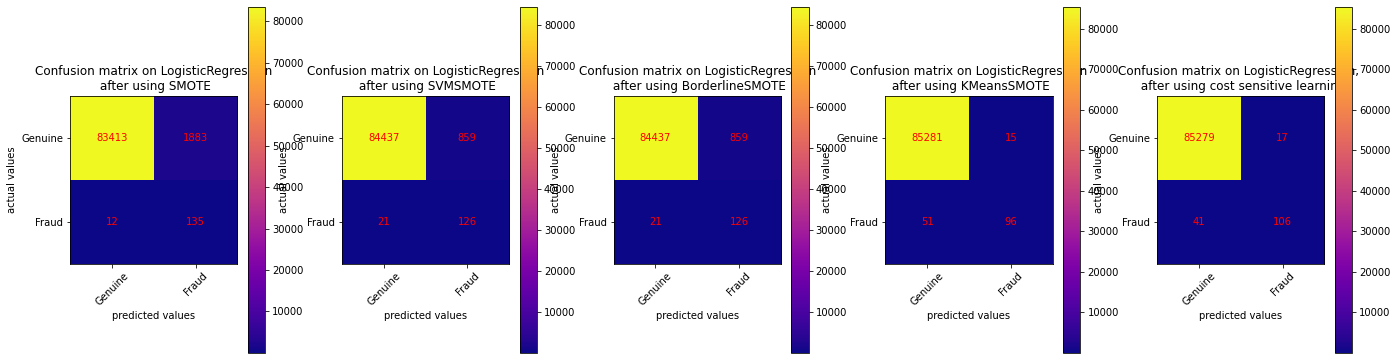

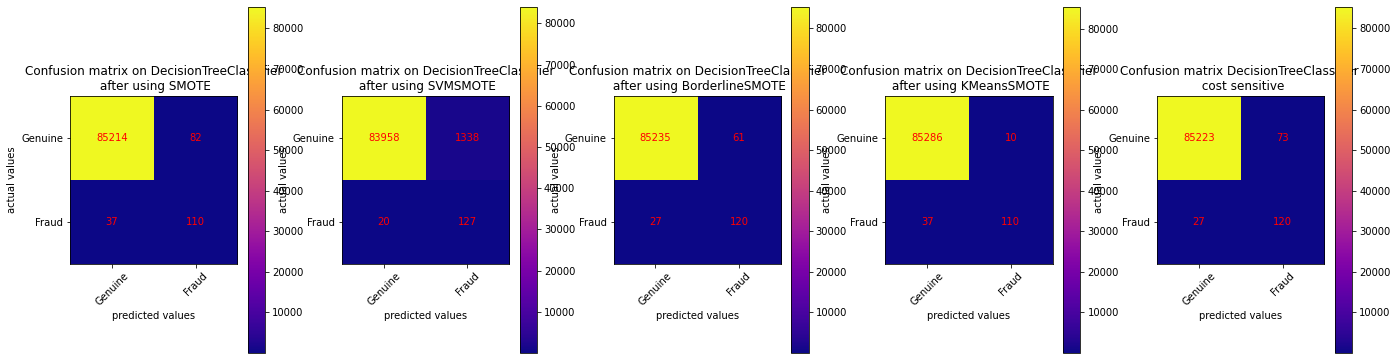

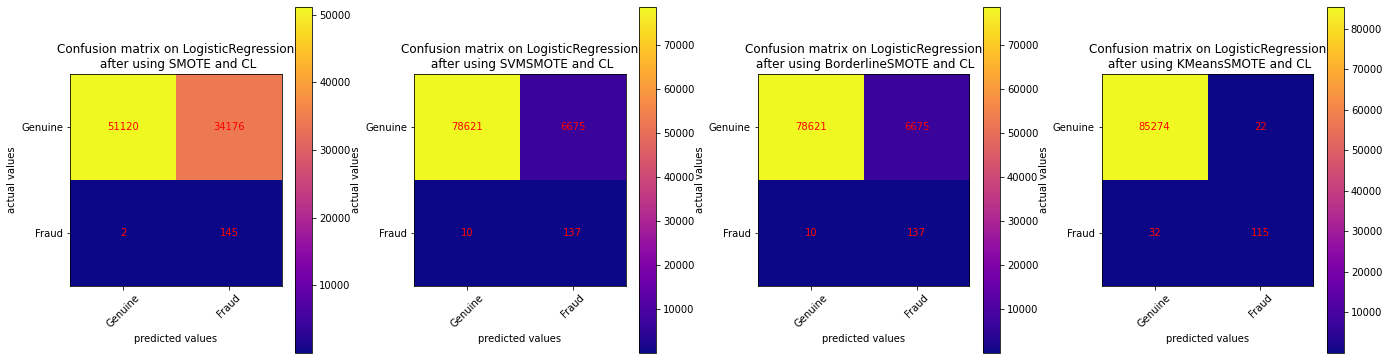

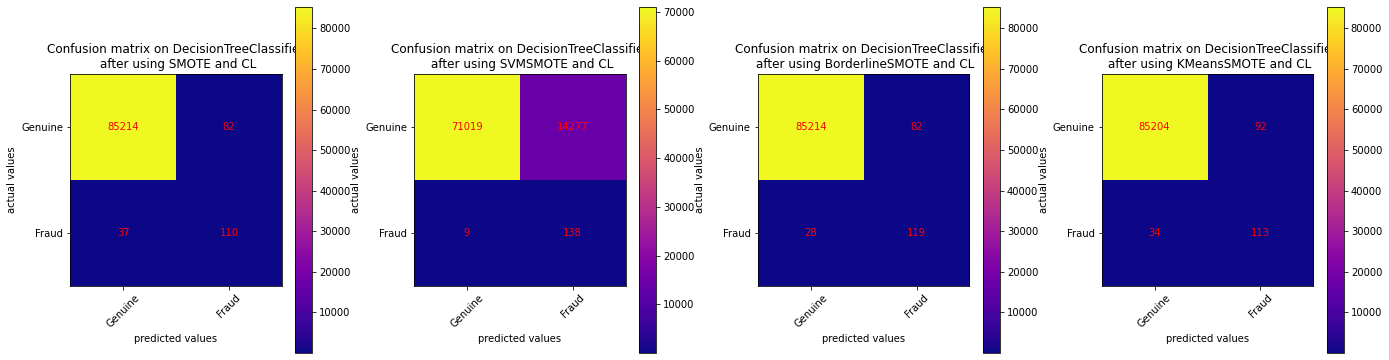

In [26]:
plot_matrixes(list_matrix_conf_log_reg)
plot_matrixes(list_matrix_conf_tree)

plot_matrixes(list_matrix_conf_log_reg_sens)
plot_matrixes(list_matrix_conf_tree_sens)

## ROC curve

### What is ROC: 
- metoda oceny dokładności predykcji modelu poprzez wykreślenie stosunku odsetku prawdziwej predykcji (TPR - True Positive Rate) do  odsetku nieprawdziwej predykcji (FPR - False Positive Rate). Tym bardziej stromy jest wykres tym lepiej, gdyż chcemy uzyskać jak najwyższe TPR przy najmniejszym TNR 

### AUC (Area Under Curve) - pole pod wykresem 
### Jak wyliczamy FPR i TPR

#### Wzory
$$ {TPR =  { TP \over{P} } } = { TP  \over{TP + FN} } $$
$$ {TNR =  { TN \over{N} } } = { TN  \over{TN + FP} } $$

#### Legenda
- TP - True positive
- TN - True Negative
- FN - False Negative
- FP - False Positive  
- P - Liczba pozytywnych przypadków w danych
- N - liczba negatywnych przypadków w danych

0.9165830044266816 tree sensitive
0.9818254351074513  sensitive
0.9165830044266816  sensitive


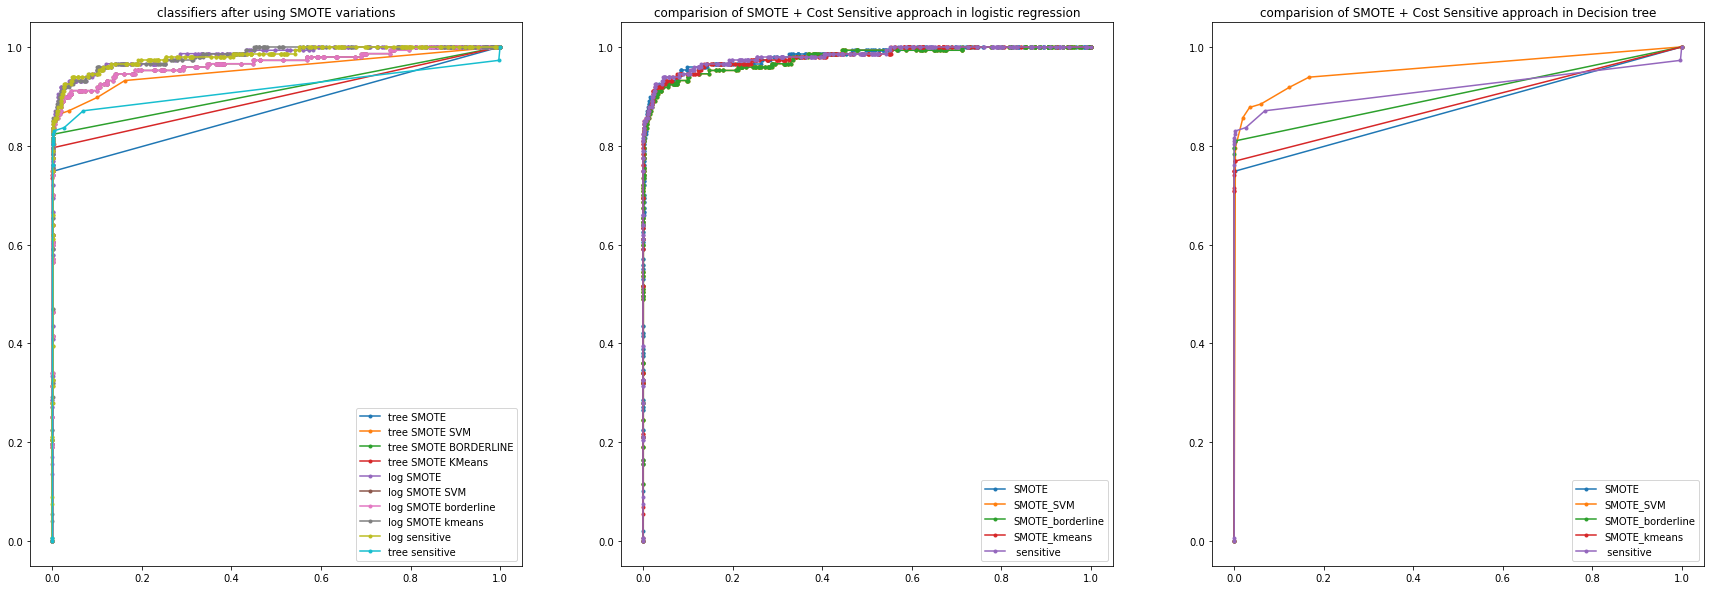

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (40, 15))


def group_roc_plot(classifiers, ax, title, test_x, test_y):
    ax.cla()
    flag = True
    best_score, score = 0 , 0
    for classifier in classifiers:
        y_pred = classifier["cls"].predict_proba(test_x)[:, 1]
        fpr, tpr, _ = roc_curve(test_y, y_pred)
        ax.plot(
            fpr, tpr, marker=".", label= f"{classifier['name']}"
        )
        if flag: 
            flag = not flag
            best_score = roc_auc_score(test_y, y_pred)
        score = roc_auc_score(test_y, y_pred)
        if best_score < score: 
            best_score = score 
    print(f"{score} {classifier['name']}")
    ax.legend()
    ax.title.set_text(title)

    # plt.subplots_adjust(
    #     left=0.0,
    #     bottom=0.2, 
    #     right=1.5, 
    #     top=.8, 
    #     wspace=0.3, 
    #     hspace=0.4
    # )


group_roc_plot(cls_all, ax[0], "classifiers after using SMOTE variations", x_test, y_test)
group_roc_plot(cls_sensitive_log, ax[1], "comparision of SMOTE + Cost Sensitive approach in logistic regression", x_test, y_test)
group_roc_plot(cls_sensitive_tree,ax[2], "comparision of SMOTE + Cost Sensitive approach in Decision tree", x_test, y_test)

0.9828162225310308 log SMOTE
0.9666477170496787 log SMOTE SVM
0.9112397467897307 tree SMOTE BORDERLINE
0.9803565207737569 log SMOTE_kmeans CS


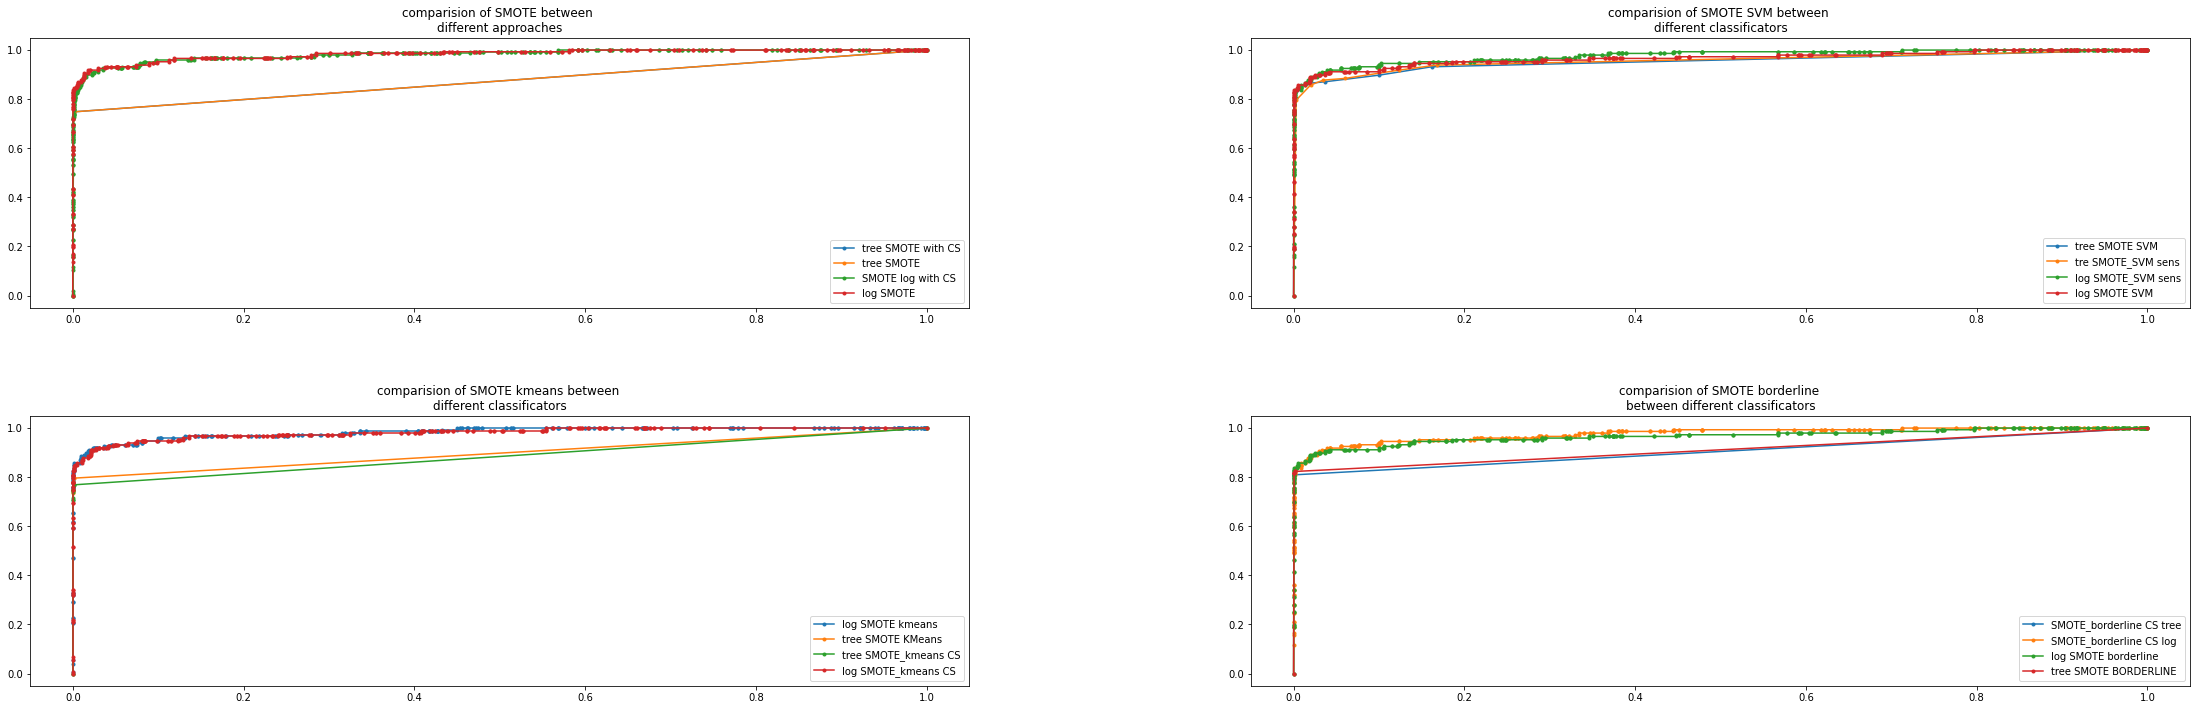

In [28]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))
group_roc_plot(cls_comp_SMOTE, ax[0][0], "comparision of SMOTE between \ndifferent approaches", x_test, y_test)
group_roc_plot(cls_comp_SMOTE_SVM, ax[0][1], "comparision of SMOTE SVM between \ndifferent classificators", x_test, y_test)
group_roc_plot(cls_comp_SMOTE_borderline, ax[1][1], "comparision of SMOTE borderline \nbetween different classificators", x_test, y_test)
group_roc_plot(cls_comp_SMOTE_kmeans, ax[1][0], "comparision of SMOTE kmeans between \ndifferent classificators", x_test, y_test)

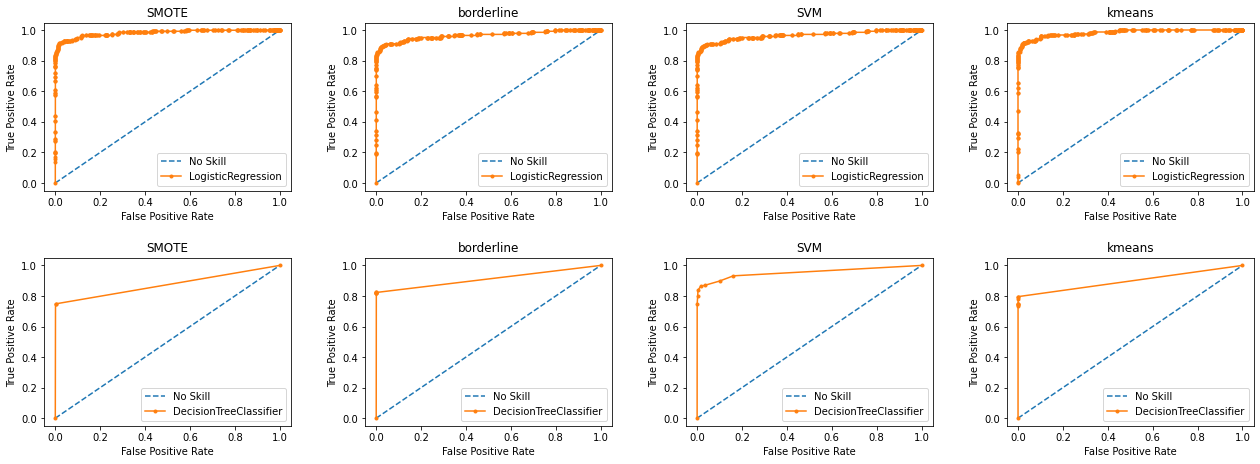

In [29]:
fig, ax = plt.subplots(2, 4, figsize= (12,8))
roc_plot( log_model_SMOTE, ax[0][0], x_test, y_test, "SMOTE")
roc_plot( log_model_borderline_SMOTE, ax[0][1], x_test, y_test, "borderline")
roc_plot( log_model_SVM_SMOTE, ax[0][2], x_test, y_test, "SVM")
roc_plot( log_model_kmeans_SMOTE, ax[0][3], x_test, y_test, "kmeans")

roc_plot( tree_model_SMOTE, ax[1][0], x_test, y_test, "SMOTE")
roc_plot( tree_model_borderline_SMOTE, ax[1][1], x_test, y_test, "borderline")
roc_plot( tree_model_SVM_SMOTE, ax[1][2], x_test, y_test, "SVM")
roc_plot( tree_model_kmeans_SMOTE, ax[1][3], x_test, y_test, "kmeans")

# roc_plot( log_model_sensitive, ax[0][2], x_test, y_test, "SENSITIVE")

# roc_plot( tree_model_SMOTE, ax[1][0], x_test, y_test, "SMOTE")
# roc_plot( tree_model_clean, ax[1][1], x_test, y_test, "NOTHING")
# roc_plot( tree_model_sensitive,  ax[1][2], x_test, y_test, "SENSITIVE")

plt.subplots_adjust(
        left=0.1,
        bottom=0.2, 
        right=1.5, 
        top=.9, 
        wspace=0.3, 
        hspace=0.4
    )

In [30]:
# scores = defaultdict(list)
# # count_scores(log_model_SMOTE, x_test, y_test, scores, "SMOTE")
# # count_scores(log_model_clean, x_test, y_test, scores, "CLEAN")
# # count_scores(log_model_RAND, x_test, y_test, scores,"RAND")
# # count_scores(tree_model_SMOTE, x_test, y_test, scores,"SMOTE")
# # count_scores(tree_model_clean, x_test, y_test, scores,"CLEAN")
# # count_scores(tree_model_RAND, x_test, y_test, scores,"RAND")

# score_df = pd.DataFrame(scores).set_index("cls")
# score_df.round(decimals=3)
# score_df